
<section style="background-color: powderblue;">
<br>
    
# **Modelado Vectorial**
## Materia: Procesamiento de Información
## Maestría en Ciencia de Datos e Información
## **Profesor: Dr. José Luis Jiménez Márquez**
## Alumno: Rodrigo Guarneros Gutiérrez

<br>
</section>


<span style="color:DarkGreen; font-size: 30px;">Introducción</span>

El objetivo de esta actividad es detectar,  a nivel básico por medio de una medida de ***similitud coseno***, el plagio que hay dentro de un conjunto de 2,370 documentos sospechosos y 237 documentos fuente.

Para tal efecto, este documento tiene las siguientes secciones:

1. Resumen ejecutivo
2. Obtención de información
3. Normalización de cada documento por lista (folder)
    * Mayúsculas
    * Símbolos
    * Tokenización
    * Stop Words
    * Stemming (derivación)
4. Similitud coseno para todos los archivos
5. Cálculo de la similaridad de Jaccard y Dice a partir del espacio vectorial definido y para hacer más comparables los resultados.
6. Los resultados en una sola tabla
7. Comparación Gráfica
8. Conclusiones

<span style="color:DarkGreen; font-size: 30px;">Dependencias</span>

In [1]:
!pip install -U scikit-learn

In [2]:
# Dependencias: 
import io
import os
import pandas as pd
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import unicodedata
import math
import seaborn as sns
import numpy as np
import nltk
import string
import pickle
from scipy.stats import rankdata
nltk.download('stopwords')
from nltk.corpus import stopwords
import random
import itertools


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<section style="background-color: powderblue;">
<br>

# 1. Resumen ejecutivo

<br>
</section>

<section style="background-color: #F5FCFF;">
<br>


## Pre-procesamiento

Después de idear la mejor forma de cargar todos los documentos disponibles en las carpetas de sospechosos y fuentes a manera de listas sobre las que se puedan realizar operaciones de iteración, se procedió al preprocesamiento de los datos, incluyendo los siguientes pasos:

- Control de Mayúsculas
- Control de Símbolos
- Tokenización
- Control de Stop Words
- Aplicación del algorítmo de Stemming (derivación), basado en Porter

## Vectorización y regla de relativización (evitemos la frecuencia absoluta con Term Frequency - Inverse Document (TF-IDF))

La similaridad de coseno se considera una técnica mucho más refinada que las anteriores. Su enfoque forma parte de vectoriales o distribucionales y están basados en una matriz de co-ocurrencia, una forma de representar qué tan frecuente es un lenguaje común (todas las columnas de la matriz) en cada uno de los documentos; estos últimos corresponden a cada renglón de la matriz. 

En este caso en particular, hemos definido una matriz de co-ocurrencia con dimensión (2607, 25624), donde 2607 corresponden a la suma de los 237 documentos fuente y 2370 documentos sospechosos (237+2370 = 2607) mientras que los 25624 se refiere a los componentes vectorizados que conforman un lenguaje común en todo el corpus.

En esta actividad, se procede a vectorizar los documentos basados en la bolsa de palabras común en todos los documentos. No obstante, la literatura señala que utilizar las frecuencias absolutas en una vectorización de los componenetes de cada documento podría estar sesgada al no conocer el contexto de los documentos. Para tal efecto, se recomienda considera la frecuencia de las palabras que ocurren al rededor de cada palabra, para tal efecto se sugiere utilizar la ponderación **tf-idf**; donde **tf** se refiere a la frecuencia del término en el documento i, e **idf** o la inversa de la frecuencia del documento donde **N** es el número total en la colección y **df** es el número de documentos donde aparece la palabra o término. Lo anterior proporciona un "peso" más alto a las palabras que ocurren solamente en algunos documentos. Así, el ***Term Frequency-Inverse Document Frequency (TF-IDF)*** es el producto punto de **tf** e **idf**:


$$w_{ij} = \text{tf}_{ij} \cdot \log\left(\frac{N}{\text{df}_i}\right)$$

Donde, 
$w_{ij}$ es el peso del término $i$ en el documento $j$;
${tf}_{ij}$ es la frecuencia del término $i$ en el documento $j$; $N$ es el número total de documentos en la colección, y
${df_i}$ es el número de documentos que contiene el término $i$.


## Similaridad de Coseno, Jaccard y Dice

Con estos vectores donde se identifica la frecuencia relativa de cada término (columna) en cada documento (renglón), de acuerdo a las reglas de relativización previamente descritos, estamos en posibilidades de aplicar la ***Similaridad de Coseno***, definida como se indica a continuación: 


$$\text{cosine.similarity}(A, B) = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert} = \frac{{\lVert A \rVert \lVert B \rVert}*Cos(\Theta)}{\lVert A \rVert \lVert B \rVert}$$

Donde ${A \cdot B}$ es el producto punto de los vectores que representan dos documentos y ${\lVert A \rVert \lVert B \rVert}$ representan las magnitudes de ambos documentos A y B.


Para efectos de poder comparar adecuadamente cada score de similaridad, se implementa Jaccard y Dice con peso relativo, utilizando la matriz de co-ocurrencia que se utilizó para calcular la Similaridad de Coseno. A continuación se describen las otras similaridades que ya habían sido calculadas previamente:

Con cada archivo pre-procesado, se elaboraron las funciones correspondientes a la implementación de la similaridad de Jaccard con peso, conforme a la literatura revisada: 

$$Jaccard(doc_1, doc_2) = \frac{|doc_1 \cap doc_2|}{|doc_1 \cup doc_2|}$$

En los mismo términos, se implementó una función también para el cálculo de la similaridad de Dice, en los siguientes términos:

$$Dice(doc_1, doc_2) = \frac{2 |doc_1 \cap doc_2|}{|doc_1| + |doc_2|}$$

## Resumen tabular
Para este caso en particular se aplicó para todo el conjunto de documentos sospechosos (***2,370 textos***) y todo el conjunto de los documentos fuente (***237 textos***). Como resultado de lo anterior, se obtuvo que en el top 20 de los documentos con mayor score de plagio, tomando en cuenta todos los documentos disponibles, dandonos el siguiente resultado donde se pueden visualizar los que tienen el mayor índice de plagio. Asimismo, se confirma que la similaridad de Jaccard continua siendo de los scores más bajos, menos o hasta la mitad de los otros scores (Coseno y Dice), en consistencia con las definiciones matemáticas de estos algorítmos de similaridad (nota, en el desarrollo de abajo se presentan los resultados de los 2,370 textos sospechosos):

|      | Documentos_Sospechosos      |   Similaridad_Coseno |   Similaridad_Jaccard |   Similaridad_Dice |
|-----:|:----------------------------|---------------------:|----------------------:|-------------------:|
| 2368 | suspicious-document2369.txt |             0.244168 |             0.110821  |          0.199531  |
| 2078 | suspicious-document2079.txt |             0.175745 |             0.0812854 |          0.15035   |
| 2058 | suspicious-document2059.txt |             0.174216 |             0.066055  |          0.123924  |
| 2363 | suspicious-document2364.txt |             0.170941 |             0.12297   |          0.219008  |
| 2369 | suspicious-document2370.txt |             0.159698 |             0.123232  |          0.219424  |
| 2059 | suspicious-document2060.txt |             0.153756 |             0.0699433 |          0.130742  |
| 2038 | suspicious-document2039.txt |             0.142314 |             0.0813008 |          0.150376  |
| 2039 | suspicious-document2040.txt |             0.141998 |             0.0819048 |          0.151408  |
| 1939 | suspicious-document1940.txt |             0.13649  |             0.0652174 |          0.122449  |
|   99 | suspicious-document0100.txt |             0.128563 |             0.0594059 |          0.11215   |
| 1546 | suspicious-document1547.txt |             0.125648 |             0.059633  |          0.112554  |
| 2219 | suspicious-document2220.txt |             0.125428 |             0.0472727 |          0.0902778 |
| 1410 | suspicious-document1411.txt |             0.125314 |             0.0572082 |          0.108225  |
| 1438 | suspicious-document1439.txt |             0.122626 |             0.0712743 |          0.133065  |
|  308 | suspicious-document0309.txt |             0.12017  |             0.0568182 |          0.107527  |
|  619 | suspicious-document0620.txt |             0.113032 |             0.0667976 |          0.12523   |
| 1047 | suspicious-document1048.txt |             0.112642 |             0.0747253 |          0.139059  |
| 1418 | suspicious-document1419.txt |             0.111092 |             0.0585106 |          0.110553  |
| 1938 | suspicious-document1939.txt |             0.109869 |             0.0774194 |          0.143713  |
| 1262 | suspicious-document1263.txt |             0.109822 |             0.0549199 |          0.104121  |

## Comparación Gráfica

La comparación gráfica nos permite confirmar lo que establece en Manning & Shütze (1999), página 299, la métrica de Jaccard penaliza casi al doble del criterio de Dice a aquellos documentos que comparten una proporción muy pequeña de sus elementos (como una propoción de todos los elementos no-cero). Ambos miden en el rango de 0 (no hay traslape entre los elementos) y 1 (existe traslape perfecto entre todos los elementos). Pero el coeficiente de Jaccard proporciona bajos valores para los casos donde el traslape es bajo. El ejemplo del autor es muy claro: dos listas con 10 elementos "no cero" y sólo una entrada en común proporciona los siguientes valores: Dice = 2x1/(10+10)=0.1 y Jaccard = 1/(10+10-1)=0.5. En el caso de nuestros scores, se puede ver que el máximo valor es dado al documento denominado "suspicious-document2369.txt" con un score de Coseno de 0.24, un score de Dice de 0.19 y una similaridad de Jaccard de 0.11 (24% de ese texto es considerado como común a las fuentes originales de acuerdo con la similaridad de coseno y de 20% con la similaridad de Jaccard). Como se puede ver en la gráfica, los niveles de Dice son regularmente el doble de los reportados con la metodología de Jaccard, sin perder de vista una estructura similar. En constraste, si comparamos a Dice con Coseno, podríamos encontrar que la similaridad tienden a no coincidir, seguramente porque la similaridad de Coseno toma en cuenta el peso relativo de los términos en su contexto, mientras que Dice le proporciona el mismo peso.

De acuerdo con la literatura, la similaridad de Coseno es mucho más versatil en la medida que puede utilizarse para comparar textos de cualquier tamaño, mientras que la similaridad de Dice y Jaccard son más utilizadas para comparaciones binarias y, por consiguiente, para temas de clasificación y clúster. Como indicamos en las conclusiones, la repetición de los componentes o términos son tomados en cuenta en el caso de la similaridad de Coseno, pero no para Jaccard y Dice. 

Se dice, entonces, que la similaridad de coseno es mejor para casos donde se comparan más de dos documentos u oraciones y donde la repetición (contexto) es importante y la extensión de los documentos cuenta. 

<p align="center">
    <img src="Comparativo.png">
    </p>

## Conclusiones

1. Como se establece en Manning & Shütze (1999), página 299, la métrica de Jaccard penaliza casi al doble del criterio de Dice a aquellos documentos que comparten una proporción muy pequeña de sus elementos (como una propoción de todos los elementos no-cero). Ambos miden en el rango de 0 (no hay traslape entre los elementos) y 1 (existe traslape perfecto entre todos los elementos). Pero el coeficiente de Jaccard proporciona bajos valores para los casos donde el traslape es bajo. El ejemplo del autor es muy claro: dos listas con 10 elementos "no cero" y sólo una entrada en común proporciona los siguientes valores: Dice = 2x1/(10+10)=0.1 y Jaccard = 1/(10+10-1)=0.5.

2. Lo que se pudo confirmar en la literatura revisada fue que la clasificación ***tf-idf*** clasifica los documentos como un todo y a las palabras según el contexto (la repetición de las palabras cercanas). En este sentido, las similaridades de Jaccard y Dice toman solamente un conjunto único de palabras para cada oración o documento; mientras que el algoritmo de coseno toma la dimensión total de los vectores (lenguaje común elaborado con todos los componentes de todos los documentos normalizados).

3. En este sentido, si encontramos repetida varias veces la palabra "commission" en la oración 1 o en el documento 1, la similaridad de coseno cambiará. Mientras que la similaridad de Jaccard o Dice no cambiará (En otras palabras, la repetición si importa en el caso de la similaridad de coseno).

3. Esta actividad permitió confirmar cómo se comporta una similaridad de coseno. Según este artículo "A Survey of Text Similarity Approaches" de Gomathi y Suresh y disponible en: https://www.researchgate.net/publication/259181798_A_Survey_of_Text_Similarity_Approaches, esta técnica es más común para comparación de textos y las de Dice y Jaccard son más usadas comunmente para tareas de clustering y clasificación.

<br>
</section>


<section style="background-color: powderblue;">
<br>

# 2. Obteniendo la información

<br>
</section>

In [3]:
# Textos sospechosos de plagio

folder_path_sospechosos = "./suspicious-documents/"
sospechosos = []

# Iteramos sobre los elementos que están contenidos en el folder de sospechosos
for archivo in os.listdir(folder_path_sospechosos):
    if archivo.endswith(".txt"):
        # Se construye el path completo de cada archivo con extensión txt
        file_path = os.path.join(folder_path_sospechosos, archivo)
        with open(file_path, "r", encoding="UTF-8") as f:
            contenidos = f.read()
            sospechosos.append(contenidos)

print('Leyendo todos los textos...')
print(f'Se trata de {len(sospechosos)} textos sospechosos de plagio')            
print('Un ejemplo del primer elemento de la lista de sospechosos:')
print(sospechosos[0][:600])  # imprime como ejemplo una fracción del texto inicial.



Leyendo todos los textos...
Se trata de 2370 textos sospechosos de plagio
Un ejemplo del primer elemento de la lista de sospechosos:
 WASHINGTON  ( AP )--  Robert Rubin  spent much of his life speculating what the stock market would do. He was good at it and made  $ 100 million . When he came to  Washington ,  Rubin  did essentially the same thing, speculating that if President  Clinton  would balance the budget, he would be rewarded with a booming economy. To the surprise of many, that argument caught  Clinton 's ear. And in the six years since, first as a top economic adviser and since  1995  as the  Treasury  secretary,  Rubin  has gained much credit-- in a close partnership with  Federal Reserve  Chairman  Alan Greenspa


In [4]:
# Textos originales o fuente

folder_path_fuentes = "./source-documents/"
fuentes = []

# Iteramos sobre los elementos que están contenidos en el folder de fuentes
for archivo in os.listdir(folder_path_fuentes):
    if archivo.endswith(".txt"):
        # Se construye el path completo de cada archivo con extensión txt
        file_path = os.path.join(folder_path_fuentes, archivo)
        with open(file_path, "r", encoding="UTF-8") as f:
            contenidos = f.read()
            fuentes.append(contenidos)

print('Leyendo todos los textos...')
print(f'Se trata de {len(fuentes)} textos fuente')            
print('Un ejemplo del primer elemento de la lista de textos fuente:')
print(fuentes[0][:600])  # imprime como ejemplo una fracción del texto inicial.


Leyendo todos los textos...
Se trata de 237 textos fuente
Un ejemplo del primer elemento de la lista de textos fuente:
While the commission stopped short of blaming Chief Gates for these problems, it said that no chief should serve more than two consecutive five-year terms, and that Mr. Gates, having served 13 years, should therefore turn in his badge following a transition period. But the chief, who has remained steadfast through repeated calls from community leaders for his ouster, said later: "I don't expect to just run away" from the job. Nearly one-quarter of 650 officers responding to a commission survey agreed that "racial bias on the part of officers toward minority citizens currently exists and contri


<section style="background-color: powderblue;">
<br>

# 3. Normalización

<br>
</section>

# 3.1 Mayúsculas en cada lista

In [5]:
# cada elemento en minúscula
fuentes_minusculas = [fuentes[i].lower() for i in range(len(fuentes))]
fuentes_minusculas[0][:600]

'while the commission stopped short of blaming chief gates for these problems, it said that no chief should serve more than two consecutive five-year terms, and that mr. gates, having served 13 years, should therefore turn in his badge following a transition period. but the chief, who has remained steadfast through repeated calls from community leaders for his ouster, said later: "i don\'t expect to just run away" from the job. nearly one-quarter of 650 officers responding to a commission survey agreed that "racial bias on the part of officers toward minority citizens currently exists and contri'

In [6]:
# cada elemento en minúscula
sospechosos_minusculas = [sospechosos[i].lower() for i in range(len(sospechosos))]
sospechosos_minusculas[0][:600]

" washington  ( ap )--  robert rubin  spent much of his life speculating what the stock market would do. he was good at it and made  $ 100 million . when he came to  washington ,  rubin  did essentially the same thing, speculating that if president  clinton  would balance the budget, he would be rewarded with a booming economy. to the surprise of many, that argument caught  clinton 's ear. and in the six years since, first as a top economic adviser and since  1995  as the  treasury  secretary,  rubin  has gained much credit-- in a close partnership with  federal reserve  chairman  alan greenspa"

# 3.2. Búsqueda de símbolos y eliminación

In [7]:
# SOSPECHOSOS
sospechosos_minusc_simbol = [sospechosos_minusculas[i].translate({ord(i): ' ' for i in ""''",' ', '\n', '`', ''', '/', '%', 'ø', '\xad', '+', 'μ', 'æ', 'ß', '_', '·', 'ð', '&', '=', '``', '''', '*', '!', '#', '{', '}','`', '$', '\\', '.', '(', ')', '--', ':', '``', "''", "' '", '``'"}) for i in range (len(sospechosos_minusculas))]
sospechosos_minusc_simbol[0][0:600]

' washington    ap      robert rubin  spent much of his life speculating what the stock market would do  he was good at it and made    100 million   when he came to  washington    rubin  did essentially the same thing  speculating that if president  clinton  would balance the budget  he would be rewarded with a booming economy  to the surprise of many  that argument caught  clinton  s ear  and in the six years since  first as a top economic adviser and since  1995  as the  treasury  secretary   rubin  has gained much credit   in a close partnership with  federal reserve  chairman  alan greenspa'

In [8]:
# FUENTES
fuentes_minusc_simbol = [fuentes_minusculas[i].translate({ord(i): ' ' for i in ""''",' ',  '\n', '`', ''', '/', '%', 'ø', '\xad', '+', 'μ', 'æ', 'ß', '_', '·', '!', '#', '{', '}', 'ð', '&', '=', '''', '*', '``', '`', '$', '\\', '.', '(', ')', '--', ':', '``', "''", "' '", '``'"}) for i in range (len(fuentes_minusculas))]
fuentes_minusc_simbol[0][0:600]

'while the commission stopped short of blaming chief gates for these problems  it said that no chief should serve more than two consecutive five year terms  and that mr  gates  having served 13 years  should therefore turn in his badge following a transition period  but the chief  who has remained steadfast through repeated calls from community leaders for his ouster  said later  "i don t expect to just run away" from the job  nearly one quarter of 650 officers responding to a commission survey agreed that "racial bias on the part of officers toward minority citizens currently exists and contri'

# 3.3 Tokenizamos cada texto de cada folder: sospechosos y fuentes

In [9]:
# sospechosos
sospechosos_tokens = []
for lista in sospechosos_minusc_simbol:
    tokenized_lista = nltk.word_tokenize(lista)
    sospechosos_tokens.append(tokenized_lista)

print(sospechosos_tokens[0][:60])


['washington', 'ap', 'robert', 'rubin', 'spent', 'much', 'of', 'his', 'life', 'speculating', 'what', 'the', 'stock', 'market', 'would', 'do', 'he', 'was', 'good', 'at', 'it', 'and', 'made', '100', 'million', 'when', 'he', 'came', 'to', 'washington', 'rubin', 'did', 'essentially', 'the', 'same', 'thing', 'speculating', 'that', 'if', 'president', 'clinton', 'would', 'balance', 'the', 'budget', 'he', 'would', 'be', 'rewarded', 'with', 'a', 'booming', 'economy', 'to', 'the', 'surprise', 'of', 'many', 'that', 'argument']


In [10]:
# fuentes
fuentes_tokens = []
for lista in fuentes_minusc_simbol:
    tokenized_lista = nltk.word_tokenize(lista)
    fuentes_tokens.append(tokenized_lista)

print(fuentes_tokens[0][:60])

['while', 'the', 'commission', 'stopped', 'short', 'of', 'blaming', 'chief', 'gates', 'for', 'these', 'problems', 'it', 'said', 'that', 'no', 'chief', 'should', 'serve', 'more', 'than', 'two', 'consecutive', 'five', 'year', 'terms', 'and', 'that', 'mr', 'gates', 'having', 'served', '13', 'years', 'should', 'therefore', 'turn', 'in', 'his', 'badge', 'following', 'a', 'transition', 'period', 'but', 'the', 'chief', 'who', 'has', 'remained', 'steadfast', 'through', 'repeated', 'calls', 'from', 'community', 'leaders', 'for', 'his', 'ouster']


# 3.4 Controlamos las ***stop words***

In [11]:
# Definiendo las stops words

from nltk.corpus import stopwords
stopwords_control = stopwords.words('english')
type(stopwords) # list

nltk.corpus.reader.wordlist.WordListCorpusReader

In [12]:
stop_words = set(stopwords.words('english'))

def remover_soptwords(documentos):
    documentos_finales = []
    for doc in documentos:
        documentos_limpios = [i for i in doc if not i in stop_words]
        documentos_finales.append(documentos_limpios)
    return documentos_finales


In [13]:
sospechosos_normalizados = remover_soptwords(sospechosos_tokens)
print(sospechosos_normalizados[0][:60])

['washington', 'ap', 'robert', 'rubin', 'spent', 'much', 'life', 'speculating', 'stock', 'market', 'would', 'good', 'made', '100', 'million', 'came', 'washington', 'rubin', 'essentially', 'thing', 'speculating', 'president', 'clinton', 'would', 'balance', 'budget', 'would', 'rewarded', 'booming', 'economy', 'surprise', 'many', 'argument', 'caught', 'clinton', 'ear', 'six', 'years', 'since', 'first', 'top', 'economic', 'adviser', 'since', '1995', 'treasury', 'secretary', 'rubin', 'gained', 'much', 'credit', 'close', 'partnership', 'federal', 'reserve', 'chairman', 'alan', 'greenspan', 'policies', 'spending']


In [14]:
fuentes_normalizados = remover_soptwords(fuentes_tokens)
print(fuentes_normalizados[0][:60])

['commission', 'stopped', 'short', 'blaming', 'chief', 'gates', 'problems', 'said', 'chief', 'serve', 'two', 'consecutive', 'five', 'year', 'terms', 'mr', 'gates', 'served', '13', 'years', 'therefore', 'turn', 'badge', 'following', 'transition', 'period', 'chief', 'remained', 'steadfast', 'repeated', 'calls', 'community', 'leaders', 'ouster', 'said', 'later', '``', 'expect', 'run', 'away', "''", 'job', 'nearly', 'one', 'quarter', '650', 'officers', 'responding', 'commission', 'survey', 'agreed', '``', 'racial', 'bias', 'part', 'officers', 'toward', 'minority', 'citizens', 'currently']


# 3.5 Se recomienda usar el ***stemmer*** de NLTK para facilidad, usar Porter (inglés) para reducir el vocabulario común.

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [16]:
#stemm para sospechosos normalizado
sospechosos_normalizados_stemm = [[stemmer.stem(word) for word in texto] for texto in sospechosos_normalizados]

print(sospechosos_normalizados_stemm[0][:60])

['washington', 'ap', 'robert', 'rubin', 'spent', 'much', 'life', 'specul', 'stock', 'market', 'would', 'good', 'made', '100', 'million', 'came', 'washington', 'rubin', 'essenti', 'thing', 'specul', 'presid', 'clinton', 'would', 'balanc', 'budget', 'would', 'reward', 'boom', 'economi', 'surpris', 'mani', 'argument', 'caught', 'clinton', 'ear', 'six', 'year', 'sinc', 'first', 'top', 'econom', 'advis', 'sinc', '1995', 'treasuri', 'secretari', 'rubin', 'gain', 'much', 'credit', 'close', 'partnership', 'feder', 'reserv', 'chairman', 'alan', 'greenspan', 'polici', 'spend']


In [17]:
fuentes_normalizados_stemm = [[stemmer.stem(word) for word in texto] for texto in fuentes_normalizados]

print(fuentes_normalizados_stemm[0][:60])

['commiss', 'stop', 'short', 'blame', 'chief', 'gate', 'problem', 'said', 'chief', 'serv', 'two', 'consecut', 'five', 'year', 'term', 'mr', 'gate', 'serv', '13', 'year', 'therefor', 'turn', 'badg', 'follow', 'transit', 'period', 'chief', 'remain', 'steadfast', 'repeat', 'call', 'commun', 'leader', 'ouster', 'said', 'later', '``', 'expect', 'run', 'away', "''", 'job', 'nearli', 'one', 'quarter', '650', 'offic', 'respond', 'commiss', 'survey', 'agre', '``', 'racial', 'bia', 'part', 'offic', 'toward', 'minor', 'citizen', 'current']


In [18]:
print(fuentes_normalizados_stemm[236][:60])

['studi', 'found', 'u', 'death', 'toll', 'major', 'hurrican', 'could', 'far', 'wors', 'previous', 'predict', 'head', 'nation', 'hurrican', 'center', 'said', 'tuesday', 'mark', 'open', '1988', 'atlant', 'storm', 'season', 'recent', 'complet', 'hurrican', 'coastal', 'flood', 'model', 'atlant', 'gulf', 'coast', 'show', 'mani', 'peopl', 'earlier', 'thought', 'must', 'evacu', 'certain', 'condit', 'said', 'center', 'director', 'bob', 'sheet', 'forti', 'three', 'million', 'peopl', 'live', '175', 'coastal', 'counti', 'main', 'texa', 'evacu', 'crowd', 'urban']


<section style="background-color: powderblue;">
<br>

# 4. Similaridad de coseno y el peso denominado Term Frequency-Inverse Documen Frequency (TF-IDF).


$$\text{cosine.similarity}(A, B) = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert} = \frac{{\lVert A \rVert \lVert B \rVert}*Cos(\Theta)}{\lVert A \rVert \lVert B \rVert}$$

Donde ${A \cdot B}$ es el producto punto de los vectores que representan dos documentos y ${\lVert A \rVert \lVert B \rVert}$ representan las magnitudes de ambos documentos A y B.

$$w_{ij} = \text{tf}_{ij} \cdot \log\left(\frac{N}{\text{df}_i}\right)$$

Donde, 
$w_{ij}$ es el peso del término $i$ en el documento $j$;
${tf}_{ij}$ es la frecuencia del término $i$ en el documento $j$; $N$ es el número total de documentos en la colección, y
${df_i}$ es el número de documentos que contiene el término $i$.

<br>
</section>

In [23]:
# Se requiere definir una función de tokenización para aplicar en la función TfidVectorizer en términos de la documentación en sklearn

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def custom_tokenizer(text):
    # Tokenizar usando NLTK
    tokens = nltk.word_tokenize(text)
    # quitar stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Primero convertimos nuestra colección de documentos en vectores.

from sklearn.feature_extraction.text import TfidfVectorizer

source_docs = fuentes_minusc_simbol
suspicious_docs = sospechosos_minusc_simbol

all_docs = []
all_docs.extend(source_docs)
all_docs.extend(suspicious_docs)
tfidf_vec = TfidfVectorizer(strip_accents='unicode', stop_words='english', tokenizer=custom_tokenizer, analyzer='word')
vectors = tfidf_vec.fit_transform(all_docs) # TF-IDF Matriz de término documento

C:\Users\rodri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
# Obtenemos los nombres de cada palabra en el MODELO VECTORIAL
nombres = tfidf_vec.get_feature_names_out() # VOCABULARIO ÚNICO

# Convertir la matriz dispersa en una matriz de densidad y entonces en un df pandas para visualizar el espacio vectorial.
# donde se puede calcular un vocavulario único para todos los documentos
densidad = vectors.todense()
df = pd.DataFrame(densidad, columns=nombres)
del df["''"]
df.head()

,0,00,000,002,00202,008,01,0107z,011,0133,...,zoom,zooming,zoster,zouk,zucker,zuckerman,zueva,zuma,zurich,zyuganov
0,0.000000,0.0,0.010670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.049329,0.0,0.080514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.05309,0.0,0.0,0.0
3,0.000000,0.0,0.057754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [26]:
# for k, d in enumerate(all_docs):
#     print('doc', k)
#     for t in d.lower().replace(",", "").split():
#         if t in tfidf_vec.get_feature_names_out():
#             print("t;", t, "w:", vectors[k, tfidf_vec.get_feature_names_out().index(t)])

            
for k, d in enumerate(all_docs):
    print("Documento", k+1)
    for t in d.lower().replace(",", "").split():
        feature_names = tfidf_vec.get_feature_names_out().tolist()
        if t in feature_names:
            index = feature_names.index(t)
            print("t:", t, "w:", vectors[k, index])
    print("-----")

# obteniendo el pesado para cada uno de los tokens, ya podemos aplicar la similaridad de coseno.

Documento 1
t: commission w: 0.3228681352235107
t: stopped w: 0.022644574966238742
t: short w: 0.020991943490625213
t: blaming w: 0.04225636189425465
t: chief w: 0.24722032821082557
t: gates w: 0.26120494598906135
t: problems w: 0.04348910372710896
t: said w: 0.08439431839618648
t: chief w: 0.24722032821082557
t: serve w: 0.04415057725086197
t: consecutive w: 0.03284570574538205
t: year w: 0.007537564947200062
t: terms w: 0.019196278547875957
t: mr w: 0.047951550583982566
t: gates w: 0.26120494598906135
t: served w: 0.02087977144846863
t: 13 w: 0.018694051291367034
t: years w: 0.02403358934350335
t: turn w: 0.01628507296209248
t: badge w: 0.03763810975030034
t: following w: 0.019744643726497372
t: transition w: 0.060442749940974004
t: period w: 0.04126966221851561
t: chief w: 0.24722032821082557
t: remained w: 0.024119066681034328
t: steadfast w: 0.048818357381686495
t: repeated w: 0.024167042727702828
t: calls w: 0.01755707119360248
t: community w: 0.10883129135635079
t: leaders w: 0.

KeyboardInterrupt: 

In [27]:
v =  vectors[0].toarray()[0]
print(type(v))
v.shape

<class 'numpy.ndarray'>


(25624,)

In [31]:
# Nos indica que la matriz o espacio vectorial tiene una dimensión de 2607 X 25624. 2607 documentos que coincide con el total de documentos que tenemos de sumar los 2370 documentos sospechosos y los 237 documentos fuente. 
# De igual forma, el lenguaje común de todos estos documentos implica 25,624 componentes o tokens. Cada vector renglón de la matriz representa la vectorización de cada uno de los documentos que deseamos comparar.
v =  vectors.toarray()
print(type(v))
v.shape

<class 'numpy.ndarray'>


(2607, 25624)

In [32]:
v = tfidf_vec.transform([suspicious_docs[0]])
v = v.toarray()[0]
print(v * v) # multiplica cada componente del vector por sí misma.

[0. 0. 0. ... 0. 0. 0.]


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming vectors is the numpy array with TF-IDF weights
# for all documents (suspicious and sources)
num_fuentes = 237
suspicious_vectors = vectors[:num_fuentes]
source_vectors = vectors[num_fuentes:]

# Calculate cosine similarity between each suspicious document and all source documents
for i, suspicious_vec in enumerate(suspicious_vectors):
    similarities = cosine_similarity(suspicious_vec.reshape(1, -1), source_vectors)
    # similarities is a 2D array with shape (1, num_sources)
    # containing cosine similarity scores between the i-th suspicious document and all source documents
    # You can print or use these scores as per your requirement

In [35]:
print(suspicious_vectors.shape)
print(source_vectors.shape)

(237, 25624)
(2370, 25624)


In [36]:
similaridades_coseno = similarities.tolist()
len(similaridades_coseno[0])

2370

In [37]:
# Creamos la lista con los nombres de los 2370 archivos sospechosos
directorio = "./suspicious-documents/"
archivos_nombres = [f for f in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, f))]

<section style="background-color: powderblue;">
<br>

# 5. Cálculo de la similaridad de Jaccard y Dice a partir del espacio vectorial definido y para hacer más comparables los resultados.

<br>
</section>

In [38]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.exceptions import DataConversionWarning

import warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Assuming vectors is the numpy array with TF-IDF weights
# for all documents (suspicious and sources)
num_suspicious = 237
suspicious_vectors = vectors[:num_suspicious].toarray() # convert to dense matrix
source_vectors = vectors[num_suspicious:].toarray() # convert to dense matrix

# Calculate Jaccard similarity between each suspicious document and all source documents
for i, suspicious_vec in enumerate(suspicious_vectors):
    similarities = 1 - pairwise_distances(suspicious_vec.reshape(1, -1), source_vectors, metric='jaccard')
    # similarities is a 2D array with shape (1, num_sources)
    # containing Jaccard similarity scores between the i-th suspicious document and all source documents
    # You can print or use these scores as per your requirement



In [39]:
similaridad_jaccard = similarities.tolist()
len(similaridad_jaccard[0])

2370

In [40]:
from sklearn.metrics.pairwise import pairwise_distances

num_suspicious = 237
suspicious_vectors = vectors[:num_suspicious].toarray() # convert to dense matrix
source_vectors = vectors[num_suspicious:].toarray() # convert to dense matrix

# Calculate Dice similarity between each suspicious document and all source documents
for i, suspicious_vec in enumerate(suspicious_vectors):
    similarities = 1 - pairwise_distances(suspicious_vec.reshape(1, -1), source_vectors, metric='dice')
    # similarities is a 2D array with shape (1, num_sources)
    # containing Dice similarity scores between the i-th suspicious document and all source documents
    # You can print or use these scores as per your requirement


In [41]:
similaridad_dice = similarities.tolist()
len(similaridad_dice[0])

2370

<section style="background-color: powderblue;">
<br>

# 6. Los resultados en una tabla resumen

<br>
</section>

In [42]:
# creamos el df con los resultados de cada score de similaridad resultante del espacio vectorial y
# los métodos utilizados previamente para Similaridad de Coseno, Similaridad de Jaccard y Similaridad de Dice.

resultados = pd.DataFrame({
    "Documentos_Sospechosos": archivos_nombres, 
    "Similaridad_Coseno": similaridades_coseno[0], 
    "Similaridad_Jaccard": similaridad_jaccard[0],
    "Similaridad_Dice": similaridad_dice[0]
})

resultados

,Documentos_Sospechosos,Similaridad_Coseno,Similaridad_Jaccard,Similaridad_Dice
0,suspicious-document0001.txt,0.017990,0.020877,0.040900
1,suspicious-document0002.txt,0.021845,0.022124,0.043290
2,suspicious-document0003.txt,0.025316,0.040195,0.077283
3,suspicious-document0004.txt,0.083079,0.060914,0.114833
4,suspicious-document0005.txt,0.050743,0.040241,0.077369
...,...,...,...,...
2365,suspicious-document2366.txt,0.076460,0.076305,0.141791
2366,suspicious-document2367.txt,0.066530,0.077652,0.144112
2367,suspicious-document2368.txt,0.080629,0.054299,0.103004
2368,suspicious-document2369.txt,0.244168,0.110821,0.199531


In [43]:
# ¿Cuáles son los documentos sospechosos con mayor índice de plagio?

resultados_ranking = resultados.sort_values('Similaridad_Coseno', ascending=False)
resultados_ranking

,Documentos_Sospechosos,Similaridad_Coseno,Similaridad_Jaccard,Similaridad_Dice
2368,suspicious-document2369.txt,0.244168,0.110821,0.199531
2078,suspicious-document2079.txt,0.175745,0.081285,0.150350
2058,suspicious-document2059.txt,0.174216,0.066055,0.123924
2363,suspicious-document2364.txt,0.170941,0.122970,0.219008
2369,suspicious-document2370.txt,0.159698,0.123232,0.219424
...,...,...,...,...
912,suspicious-document0913.txt,0.002752,0.011655,0.023041
781,suspicious-document0782.txt,0.002737,0.011628,0.022989
921,suspicious-document0922.txt,0.002714,0.011601,0.022936
1150,suspicious-document1151.txt,0.002688,0.011710,0.023148


In [47]:
# Los documentos rankeados en el top 20 para cada sospechoso son: 
resultados_ranking = resultados_ranking.head(20)
resultados_ranking

,Documentos_Sospechosos,Similaridad_Coseno,Similaridad_Jaccard,Similaridad_Dice
2368,suspicious-document2369.txt,0.244168,0.110821,0.199531
2078,suspicious-document2079.txt,0.175745,0.081285,0.150350
2058,suspicious-document2059.txt,0.174216,0.066055,0.123924
2363,suspicious-document2364.txt,0.170941,0.122970,0.219008
2369,suspicious-document2370.txt,0.159698,0.123232,0.219424
2059,suspicious-document2060.txt,0.153756,0.069943,0.130742
2038,suspicious-document2039.txt,0.142314,0.081301,0.150376
2039,suspicious-document2040.txt,0.141998,0.081905,0.151408
1939,suspicious-document1940.txt,0.136490,0.065217,0.122449
99,suspicious-document0100.txt,0.128563,0.059406,0.112150


<section style="background-color: powderblue;">
<br>

# 7. Restulados Gráficos

<br>
</section>

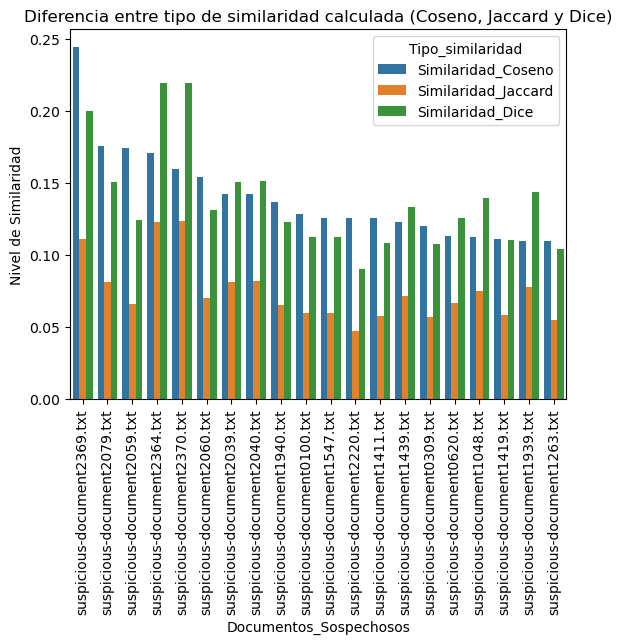

In [48]:
resultados_ranking_long = pd.melt(resultados_ranking, id_vars=["Documentos_Sospechosos"], 
                          value_vars=["Similaridad_Coseno", "Similaridad_Jaccard", "Similaridad_Dice"], 
                          var_name="Tipo_similaridad", value_name="Valor_similaridad")
    
sns.barplot(x='Documentos_Sospechosos', y='Valor_similaridad', hue='Tipo_similaridad', data= resultados_ranking_long)
plt.xticks(rotation=90)
plt.ylabel('Nivel de Similaridad')
plt.title('Diferencia entre tipo de similaridad calculada (Coseno, Jaccard y Dice)');
plt.savefig("Comparativo.png", dpi=200, bbox_inches='tight')
plt.show()

<section style="background-color: powderblue;">
<br>

# 8. Conclusiones

<br>
</section>

1. Como se establece en Manning & Shütze (1999), página 299, la métrica de Jaccard penaliza casi al doble del criterio de Dice a aquellos documentos que comparten una proporción muy pequeña de sus elementos (como una propoción de todos los elementos no-cero). Ambos miden en el rango de 0 (no hay traslape entre los elementos) y 1 (existe traslape perfecto entre todos los elementos). Pero el coeficiente de Jaccard proporciona bajos valores para los casos donde el traslape es bajo. El ejemplo del autor es muy claro: dos listas con 10 elementos "no cero" y sólo una entrada en común proporciona los siguientes valores: Dice = 2x1/(10+10)=0.1 y Jaccard = 1/(10+10-1)=0.5.

2. Lo que se pudo confirmar en la literatura revisada fue que la clasificación ***tf-idf*** clasifica los documentos como un todo y a las palabras según el contexto (la repetición de las palabras cercanas). En este sentido, las similaridades de Jaccard y Dice toman solamente un conjunto único de palabras para cada oración o documento; mientras que el algoritmo de coseno toma la dimensión total de los vectores (lenguaje común elaborado con todos los componentes de todos los documentos normalizados).

3. En este sentido, si encontramos repetida varias veces la palabra "commission" en la oración 1 o en el documento 1, la similaridad de coseno cambiará. Mientras que la similaridad de Jaccard o Dice no cambiará (En otras palabras, la repetición si importa en el caso de la similaridad de coseno).

3. Esta actividad permitió confirmar cómo se comporta una similaridad de coseno. Según este artículo "A Survey of Text Similarity Approaches" de Gomathi y Suresh y disponible en: https://www.researchgate.net/publication/259181798_A_Survey_of_Text_Similarity_Approaches, esta técnica es más común para comparación de textos y las de Dice y Jaccard son más usadas comunmente para tareas de clustering y clasificación.

### Bibliografía y referencias electrónicas

- Library NLTK para entender el método sent_tokenize y el módulo PunktSentenceTokenizer. Disponible en: https://www.nltk.org/api/nltk.tokenize.html y en https://www.nltk.org/api/nltk.tokenize.punkt.html#:~:text=Punkt%20Sentence%20Tokenizer,before%20it%20can%20be%20used. 
- Modelado del espacio vectorial, disponible en: https://youtu.be/2oF5Me0oKgw
- Python List extend() Method, disponible en Geek for Geeks
- Euclidean Distance & Cosine Similarity | Introduction to Data Mining part 18, disponible en: https://youtu.be/Dd16LVt5ct4
- Overview of Text Similarity Metrics in Python, available at: https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50
- Cosine similarity, cosine distance explained | Math, Statistics for data science, machine learning, disponible en: https://youtu.be/m_CooIRM3UI
- Finding Word Similarity using TF-IDF and Cosine in a Term-Context Matrix from Scratch in Python, disponible en: https://towardsdatascience.com/finding-word-similarity-using-tf-idf-in-a-term-context-matrix-from-scratch-in-python-e423533a407
- Using List as default_factory en Geek for Geeks. Disponible en: https://www.geeksforgeeks.org/defaultdict-in-python/.
- Text Normalization for Natural Language Processing in Python. Disponible en: https://lvngd.com/blog/text-normalization-natural-language-processing-python/
